# SMAI HW2: Programming Question

Go through the notebook on Optimal Bayes Classifier. 

Complete the exercise section of the notebook. In that section you are required to compare the optimal Bayes classifier and the Naïve Bayes classifier for the case where the covariance is non-zero, and 

(a) Plot the decision boundary; and 

(b) Print the accuracy achieved by the two methods.

# Optimal Bayes Classifier - Excercise Notebook


### Comparing Optimal Bayes and Naive Bayes using simulated Gaussian data for non-zero covariance.

## Imports

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import itertools
from scipy.stats import norm
import scipy.stats
from sklearn.naive_bayes import GaussianNB
sns.set()

## Data Generation

In [2]:
# data of Gaussian Distributions
np.random.seed(seed=3)
# distribution1
mu1 = [2, 2]
sigma1 = [[5, -4], [-4, 5]]
x1, y1 = np.random.multivariate_normal(mu1, sigma1, 100).T
# distribution2
mu2 = [-2, -2]
sigma2 = [[3.5, 3], [3, 3.5]]
x2, y2 = np.random.multivariate_normal(mu2, sigma2, 100).T

In [3]:
N = 100
mu_list = [mu1, mu2]
sigma_list = [sigma1, sigma2]
# makes the x1 and y1 stack on top of each other
X_d = np.hstack((x1, x2))
Y_d = np.hstack((y1, y2))
# Data input and output for model training
X_data = np.asarray(np.vstack((X_d, Y_d)).T)
y_labels = np.hstack((np.zeros(N), np.ones(N)))

Here, we observe a strong covariance between x and y.

## Exercise: A) Plot the decision boundary

Code for comparing the decision boundary for the optimal and the naive Bayes classifiers:


### Optimal Baye's class identifier

The following function returns the predicted class number using an optimal bayes classifier.

`scipy.stats.multivariate_normal.pdf` returns the PDF value corresponding to the point, given the mean and sigma, hence the distribution should be known beforehand.


In [4]:
def predict_class_optimal(point):
    score_1 = scipy.stats.multivariate_normal.pdf(point, mean=mu1, cov=sigma1)
    score_2 = scipy.stats.multivariate_normal.pdf(point, mean=mu2, cov=sigma2)
    scores_list = [np.linalg.norm(score_1), np.linalg.norm(score_2)]
    return np.argmax(scores_list)

### Naive Bayes Classifier

The following section trains the naive bayes model, and returns it.

In [5]:
model_sk = GaussianNB(priors=None)
model_sk.fit(X_data, y_labels)

GaussianNB()

### Plot of the decision boundary

In [6]:
X = np.linspace(-8, 8, N)
Y = np.linspace(-8, 8, N)
X, Y = np.meshgrid(X, Y)

#### Z values corresponding to each and every point per model

In [7]:
def optimal_bayes_Z():
    return  np.array([predict_class_optimal(np.array([xx, yy]))
              for xx, yy in zip(np.ravel(X), np.ravel(Y))]).reshape(X.shape)

In [8]:
def naive_bayes_Z():
    return np.array([model_sk.predict([[xx, yy]])[0]
              for xx, yy in zip(np.ravel(X), np.ravel(Y))]).reshape(X.shape)

#### Code for the graph

Text(0.5, 1.0, 'Optimal Bayes vs Naive Bayes')

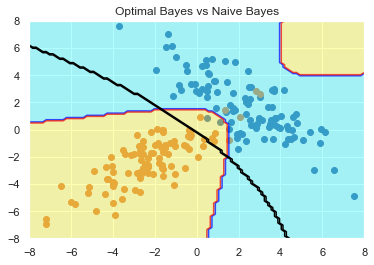

In [9]:
ax = plt.axes()

# Plot of the points
plt.scatter(x1, y1)
plt.scatter(x2, y2)

# Optimal Bayes
Z = optimal_bayes_Z()
ax.contour(X, Y, Z, 1, alpha=.7,  colors=('blue', 'red'))
ax.contourf(X, Y, Z, 1, alpha=.3, colors=('cyan', 'yellow'))

# Naive Bayes
Z = naive_bayes_Z()
ax.contour(X, Y, Z, 1,  colors=('black'))


ax.set_title("Optimal Bayes vs Naive Bayes")


Here, Black: Naive , blue/yellow: Optimal

## Exercise: B) Accuracies

Code for comparing the accuracies of the optimal and the naive Bayes classifiers goes here


In [10]:
# Optimal Bayes accuracy
pred = np.array([predict_class_optimal(np.array([xx, yy]))
                 for xx, yy in zip(np.ravel(X_d), np.ravel(Y_d))])
labels = np.hstack((np.zeros(100), np.ones(100)))
print("Accuracy of Optimal: ", np.mean(pred == labels))
# Naive Bayes accuracy
print("Accuracy of Naive: ", model_sk.score(X_data, y_labels))

Accuracy of Optimal:  0.965
Accuracy of Naive:  0.95
